DSF Assignment 3: Group assignment

Allison, Pelin and Anastasia

We will use the data from this competition https://www.drivendata.org/competitions/1/united-nations-millennium-development-goals/.

1. Load the data from the competition, removing any possible meaningless column.

2. The "Series Code" column contains codes with segments separated by periods ".". Suppose that the first segment represents some global "category". How many unique categories are?

3. Write a function that receives a country name and returns a pandas DataFrame indexed by year with all the series as columns. Write another similar function that receives a series name and returns the countries.

4. Plot the "Alternative and nuclear energy (% of total energy use)" of your three countries in the same plot, as well as a centered, 3 year rolling mean.

5. Which are the 8 countries with the largest "Electricity production from coal sources (kWh)"? Plot the series for those 8 countries.

6. Among the countries that had a nonzero "Electricity production from coal sources (kWh)" in each of the last 5 years of the dataset, which are the 8 ones that had the biggest percentual increase in those last 5 years? Plot the series for those 8 countries.

7. Pick some health or development indicators of your choice. "Is the world doing better or worse?". Discuss, compare different countries and/or continents, correlate with other indexes


1. Load the data from the competition, removing any possible meaningless column.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from datetime import datetime 

# change the max width of pandas rows and columns to display
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', -1)

In [2]:
data = pd.read_csv("/Users/allison/Desktop/BTSMBDS/Data Science Foundations/data/TrainingSet.csv")

column_name = list(data.columns)

for i in range(0,len(column_name)):
    if "YR" in column_name[i]:
        column_name[i] = datetime.strptime(str(column_name[i].split(" ", 1)[0]), '%Y').strftime('%Y')
    else:
        column_name[i] = column_name[i]        
#Here we are creating a list of column names in order to remove the unecessary extra letters from the years. 
#We also change the type to datetime. 

data.columns = column_name
data = data.drop(columns=[data.columns[0]])
# Dropped the column which name is "Unnamed: 0"

print(len(data))
data.head(2)

195402


,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,Country Name,Series Code,Series Name
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.769214,Afghanistan,allsi.bi_q1,(%) Benefits held by 1st 20% population - All Social Insurance
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.027746,Afghanistan,allsp.bi_q1,(%) Benefits held by 1st 20% population - All Social Protection


In [3]:
#We now know that there are almost 200,000 rows in this dataset, and 40 datapoints. 
#There are many missing data points in the dataset, especially in the earlier years. 

2. The "Series Code" column contains codes with segments separated by periods ".". Suppose that the first segment represents some global "category". How many unique categories are?

In [4]:
#splitting the Series Code column into two: Global Category and Other Category

data[['Global Category','Other Category']] = data.pop('Series Code').str.split('.', n=1, expand=True)

In [5]:
data['Global Category'].nunique()

62

In [6]:
#There are 62 unique categories

3. Write a function that receives a country name and returns a pandas DataFrame indexed by year with all the series as columns. Write another similar function that receives a series name and returns the countries.

In [7]:
def series_in_country(country_name):

    #new dataframe filtered by country, new index set to Series name, and then transposed so that years become index
    data_new = data.loc[data['Country Name'] == country_name].set_index(['Series Name']).T 
    
    #Drop the last three rows from newly transposed dataframe(Country, Global category, Other)
    data_new.drop(data_new.tail(3).index,inplace=True)
    
    return data_new

series_in_country('Australia').head()


Series Name,"2005 PPP conversion factor, GDP (LCU per international $)","2005 PPP conversion factor, private consumption (LCU per international $)",Achieve universal primary education,"Adjusted net enrollment rate, primary, female (% of primary school age children)","Adjusted net enrollment rate, primary, male (% of primary school age children)",Adjusted net national income (annual % growth),Adjusted net national income (constant 2005 US$),Adjusted net national income (current US$),Adjusted net national income per capita (annual % growth),Adjusted net national income per capita (constant 2005 US$),Adjusted net national income per capita (current US$),"Adjusted net savings, excluding particulate emission damage (% of GNI)","Adjusted net savings, excluding particulate emission damage (current US$)","Adjusted net savings, including particulate emission damage (% of GNI)","Adjusted net savings, including particulate emission damage (current US$)",Adjusted savings: carbon dioxide damage (% of GNI),Adjusted savings: carbon dioxide damage (current US$),Adjusted savings: consumption of fixed capital (% of GNI),Adjusted savings: consumption of fixed capital (current US$),Adjusted savings: education expenditure (% of GNI),Adjusted savings: education expenditure (current US$),Adjusted savings: energy depletion (% of GNI),Adjusted savings: energy depletion (current US$),Adjusted savings: gross savings (% of GNI),Adjusted savings: mineral depletion (% of GNI),Adjusted savings: mineral depletion (current US$),Adjusted savings: natural resources depletion (% of GNI),Adjusted savings: net forest depletion (% of GNI),Adjusted savings: net forest depletion (current US$),Adjusted savings: net national savings (% of GNI),Adjusted savings: net national savings (current US$),Adjusted savings: particulate emission damage (% of GNI),Adjusted savings: particulate emission damage (current US$),"Adolescent fertility rate (births per 1,000 women ages 15-19)",Age dependency ratio (% of working-age population),"Age dependency ratio, old (% of working-age population)","Age dependency ratio, young (% of working-age population)",Agricultural irrigated land (% of total agricultural land),Agricultural land (% of land area),Agricultural land (sq. km),"Agricultural machinery, tractors","Agricultural machinery, tractors per 100 sq. km of arable land",Agricultural methane emissions (% of total),Agricultural methane emissions (thousand metric tons of CO2 equivalent),Agricultural nitrous oxide emissions (% of total),Agricultural nitrous oxide emissions (thousand metric tons of CO2 equivalent),Agricultural raw materials exports (% of merchandise exports),Agricultural raw materials imports (% of merchandise imports),Agriculture value added per worker (constant 2005 US$),"Agriculture, value added (% of GDP)","Agriculture, value added (annual % growth)","Agriculture, value added (constant 2005 US$)","Agriculture, value added (constant LCU)","Agriculture, value added (current LCU)","Agriculture, value added (current US$)","Air transport, freight (million ton-km)","Air transport, passengers carried","Air transport, registered carrier departures worldwide",Alternative and nuclear energy (% of total energy use),"Annual freshwater withdrawals, agriculture (% of total freshwater withdrawal)","Annual freshwater withdrawals, domestic (% of total freshwater withdrawal)","Annual freshwater withdrawals, industry (% of total freshwater withdrawal)","Annual freshwater withdrawals, total (% of internal resources)","Annual freshwater withdrawals, total (billion cubic meters)",Arable land (% of land area),Arable land (hectares per person),Arable land (hectares),Armed forces personnel (% of total labor force),"Armed forces personnel, total",Arms exports (SIPRI trend indicator values),Arms imports (SIPRI trend indicator values),"Automated teller machines (ATMs) (per 100,000 adults)",Average precipitation in depth (mm per year),Bank capital to assets ratio (%),Bank liquid reserves to bank 

In [8]:
def countries_in_series(series_name):
     
    x = data.loc[data['Series Name'] == series_name, 'Country Name']
    return  list(x), len(list(x))
    
countries_in_series('Achieve universal primary education')


(['Afghanistan',
  'Albania',
  'Algeria',
  'Angola',
  'Antigua and Barbuda',
  'Argentina',
  'Armenia',
  'Aruba',
  'Australia',
  'Austria',
  'Azerbaijan',
  'Bahamas, The',
  'Bahrain',
  'Bangladesh',
  'Barbados',
  'Belarus',
  'Belgium',
  'Belize',
  'Benin',
  'Bermuda',
  'Bhutan',
  'Bolivia',
  'Botswana',
  'Brunei Darussalam',
  'Bulgaria',
  'Burkina Faso',
  'Burundi',
  'Cabo Verde',
  'Cambodia',
  'Cameroon',
  'Canada',
  'Cayman Islands',
  'Central African Republic',
  'Chad',
  'Chile',
  'China',
  'Colombia',
  'Comoros',
  'Congo, Dem. Rep.',
  'Congo, Rep.',
  'Costa Rica',
  "Cote d'Ivoire",
  'Croatia',
  'Cuba',
  'Cyprus',
  'Denmark',
  'Djibouti',
  'Dominica',
  'Dominican Republic',
  'Ecuador',
  'Egypt, Arab Rep.',
  'El Salvador',
  'Equatorial Guinea',
  'Eritrea',
  'Estonia',
  'Ethiopia',
  'Fiji',
  'Finland',
  'France',
  'French Polynesia',
  'Gabon',
  'Gambia, The',
  'Georgia',
  'Germany',
  'Ghana',
  'Greece',
  'Grenada',
  'Gua

4. Plot the "Alternative and nuclear energy (% of total energy use)" of your three countries in the same plot, as well as a centered, 3 year rolling mean.

In [9]:
#Note that there is no data for Russian Federation (Anastasia), so we are using Australia (Allison), Turkey (Pelin), and Spain

#Created new dataframe filtered by Alternative and nuclear energy series name, and including only data for our countries, and then transposing so the countries are the column titles
our_countries = data.loc[((data['Country Name'] == 'Australia')|(data['Country Name'] == 'Turkey')|(data['Country Name'] == 'Spain')) & (data['Series Name']=='Alternative and nuclear energy (% of total energy use)')].set_index(['Country Name']).T
our_countries.index.name = 'Year'

#Drop the last four rows from newly transposed dataframe(Country, Global category, Other, Series Name)
our_countries.drop(our_countries.tail(3).index,inplace=True)

our_countries.head()

Country Name,Australia,Spain,Turkey
Year,,,
1972,1.87181,9.56525,1.42012
1973,1.71997,8.12863,1.1181
1974,1.93077,8.07096,1.34412
1975,2.09709,7.31891,2.10579
1976,2.10287,6.10673,2.67164


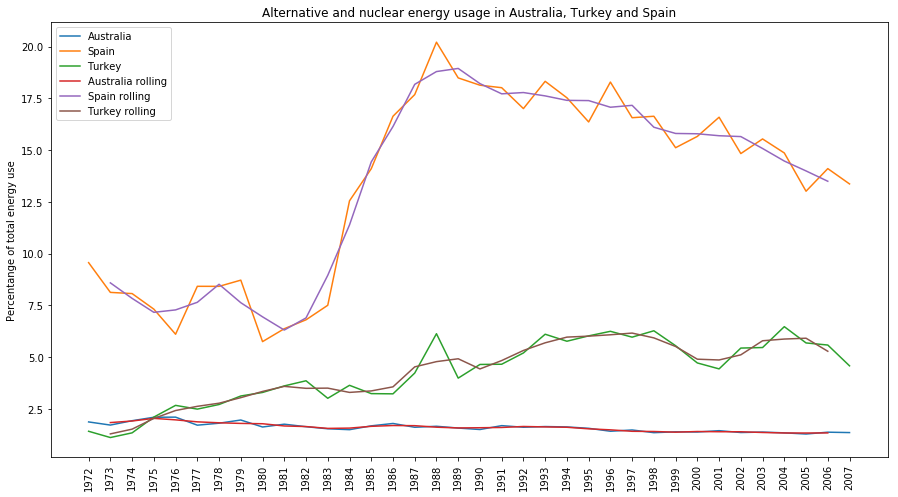

In [25]:
plt.figure(figsize=(15,8))
plt.ylabel('Percentange of total energy use')
plt.title('Alternative and nuclear energy usage in Australia, Turkey and Spain')
 
list_a = list(our_countries.columns.values)
list_b = list(our_countries.columns.values+" rolling")
list_a.extend(list_b)
 
plt.plot(our_countries)
plt.plot(our_countries.rolling(3, center = True).mean())
 
plt.legend(list_a, loc='upper left')
 
plt.xticks(rotation="vertical");

5. Which are the 8 countries with the largest "Electricity production from coal sources (kWh)"? Plot the series for those 8 countries.

In [11]:
#locate the data for the electricity production series name, and remove the extra columns
largest_8 = data.loc[data['Series Name'] == 'Electricity production from coal sources (kWh)'].drop(columns=['Series Name', 'Global Category', 'Other Category'])

#create new column that calculates the average electricity production across all years in the dataframe
largest_8['mean'] = largest_8.mean(1)

#filter dataframe to the 8 countries with the largest mean, set index as Country Name and transpose
largest_8 = largest_8.nlargest(8, columns='mean', keep='first').set_index(['Country Name']).T
largest_8.index.name = 'Year'

#Drop the mean row from newly transposed dataframe
largest_8.drop(largest_8.tail(1).index,inplace=True)
    
largest_8.head()

#We have chosen the mean for our calculations because we feel it is the most accurate measure of electricity production overall. 
#We considered using max values or the sum of all years, but due to missing data, mean seemed the most appropriate. 

Country Name,United States,China,Germany,India,United Kingdom,Russian Federation,South Africa,Japan
Year,,,,,,,,
1972,8.249700e+11,9.775300e+10,2.503480e+11,3.668100e+10,1.452410e+11,NaN,5.868400e+10,4.160000e+10
1973,9.073600e+11,9.771300e+10,2.583160e+11,3.595800e+10,1.746090e+11,NaN,6.340500e+10,3.730000e+10
1974,8.646820e+11,9.684500e+10,2.624910e+11,4.103900e+10,1.488310e+11,NaN,6.851000e+10,3.976100e+10
1975,8.908520e+11,1.106650e+11,2.428290e+11,4.411100e+10,1.694680e+11,NaN,7.377400e+10,4.231700e+10
1976,9.871130e+11,1.043600e+11,2.784880e+11,5.177500e+10,1.798670e+11,NaN,7.745300e+10,4.377000e+10


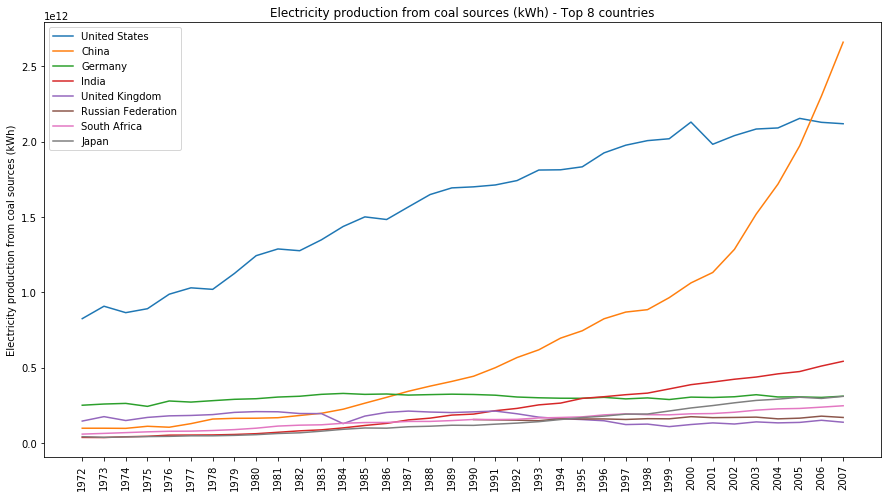

In [26]:
plt.figure(figsize=(15,8))
plt.ylabel('Electricity production from coal sources (kWh)')
plt.title('Electricity production from coal sources (kWh) - Top 8 countries')
 
list_a = list(largest_8.columns.values)
plt.plot(largest_8)
plt.legend(list_a, loc='upper left')
plt.xticks(rotation="vertical");

In [13]:
#NEED TO DO XTICKS!!

#The above 8 countries have the highest average electricity production from coal over the 35 years of data. 
#We can see that China has had a rapid increase in output in the recent decades.

6. Among the countries that had a nonzero "Electricity production from coal sources (kWh)" in each of the last 5 years of the dataset, which are the 8 ones that had the biggest percentual increase in those last 5 years? Plot the series for those 8 countries.

In [14]:
data.head()

,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,Country Name,Series Name,Global Category,Other Category
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.769214,Afghanistan,(%) Benefits held by 1st 20% population - All Social Insurance,allsi,bi_q1
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.027746,Afghanistan,(%) Benefits held by 1st 20% population - All Social Protection,allsp,bi_q1
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.244887,Afghanistan,(%) Benefits held by 1st 20% population - All Social Safety Nets,allsa,bi_q1
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.933105,Afghanistan,(%) Generosity of All Social Insurance,allsi,gen_pop
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.996814,Afghanistan,(%) Generosity of All Social Protection,allsp,gen_pop


In [15]:
#locate the data for the electricity production series name, and remove the extra columns
df_percent = data.loc[data['Series Name']== "Electricity production from coal sources (kWh)"].drop(columns=['Series Name', 'Global Category', 'Other Category']).set_index(['Country Name']).T
df_percent.index.name = 'Year'

#Filter to only non-zero columns
df_percent = df_percent.loc[:, (df_percent != 0).all(axis=0)]

#Create new row that calculates percent growth over last 5 years
df_percent.loc["Growth during last 5 years"] = ((df_percent.loc["2007"] - df_percent.loc["2003"])/ df_percent.loc["2003"])

#Find top 8
df_percent = df_percent.T.nlargest(8, columns='Growth during last 5 years', keep='first').T.head(36)

df_percent

Country Name,Chile,Argentina,Vietnam,China,Turkey,Thailand,Kosovo,"Korea, Rep."
Year,,,,,,,,
1972,8.540000e+08,6.150000e+08,1.778000e+09,9.775300e+10,2.921000e+09,2.680000e+08,NaN,8.120000e+08
1973,1.227000e+09,6.310000e+08,1.930000e+09,9.771300e+10,3.244000e+09,2.440000e+08,NaN,1.341000e+09
1974,1.061000e+09,6.780000e+08,1.650000e+09,9.684500e+10,3.871000e+09,3.450000e+08,NaN,7.430000e+08
1975,8.020000e+08,6.500000e+08,1.928000e+09,1.106650e+11,4.113000e+09,3.420000e+08,NaN,1.312000e+09
1976,9.890000e+08,6.270000e+08,2.400000e+09,1.043600e+11,4.327000e+09,3.870000e+08,NaN,1.475000e+09
1977,1.060000e+09,5.350000e+08,2.873000e+09,1.281810e+11,4.892000e+09,3.450000e+08,NaN,1.390000e+09
1978,1.201000e+09,7.560000e+08,2.800000e+09,1.586520e+11,5.569000e+09,4.890000e+08,NaN,9.290000e+08
1979,1.615000e+09,6.800000e+08,2.600000e+09,1.634930e+11,6.438000e+09,1.273000e+09,NaN,1.252000e+09
1980,1.890000e+09,8.190000e+08,1.421000e+09,1.641490e+11,5.960000e+09,1.410000e+09,NaN,2.481000e+09


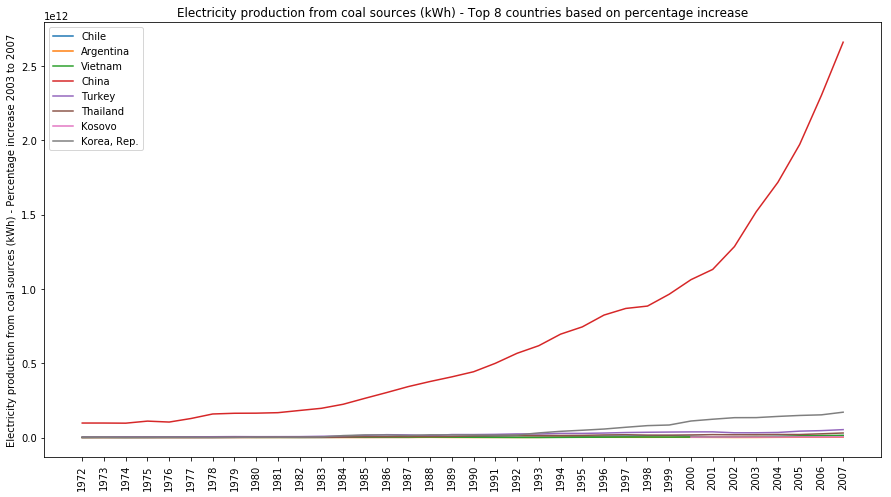

In [27]:
plt.figure(figsize=(15,8))
plt.ylabel('Electricity production from coal sources (kWh) - Percentage increase 2003 to 2007')
plt.title('Electricity production from coal sources (kWh) - Top 8 countries based on percentage increase')

list_a = list(df_percent.columns.values)
plt.plot(df_percent)
plt.legend(list_a, loc='upper left')
plt.xticks(rotation="vertical");

In [17]:
#China has a massive percentage increase in comparison to the other countries in the top 8. 

7. Pick some health or development indicators of your choice. "Is the world doing better or worse?". Discuss, compare different countries and/or continents, correlate with other indexes.

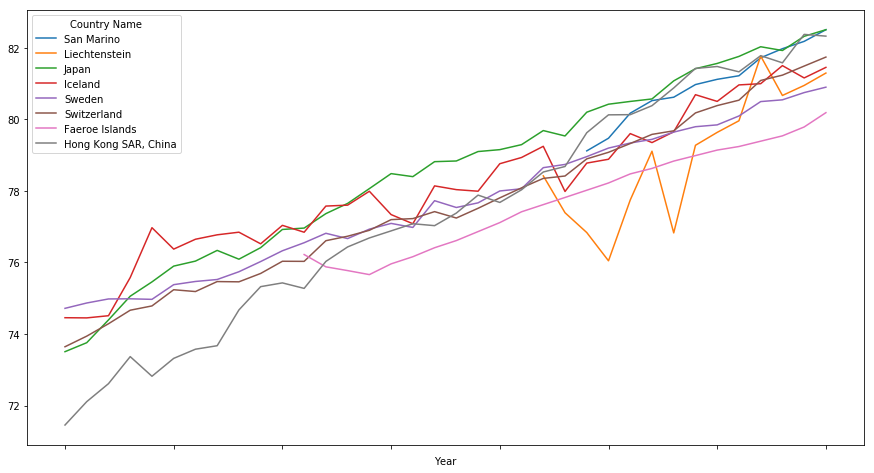

In [18]:
def series_top(series_name):
    
    new = data.loc[data['Series Name'] == series_name].drop(columns=['Series Name', 'Global Category', 'Other Category'])
    new['mean'] = new.mean(1)
    new = new.nlargest(8, columns='mean', keep='first').set_index(['Country Name']).T
    new.index.name = 'Year'
    new.drop(new.tail(1).index,inplace=True)

    return new.plot(figsize = (15, 8));
    
series_top('Life expectancy at birth, total (years)')

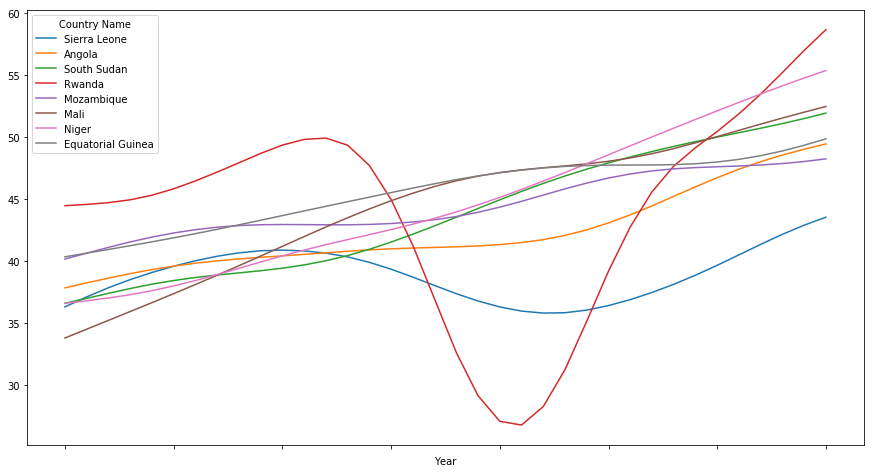

In [19]:
def series_bottom(series_name):
    
    new = data.loc[data['Series Name'] == series_name].drop(columns=['Series Name', 'Global Category', 'Other Category'])
    new['mean'] = new.mean(1)
    new = new.nsmallest(8, columns='mean', keep='first').set_index(['Country Name']).T
    new.index.name = 'Year'
    new.drop(new.tail(1).index,inplace=True)

    return new.plot(figsize = (15, 8));
    
series_bottom('Life expectancy at birth, total (years)')

In [20]:
import geonamescache

gc = geonamescache.GeonamesCache()
countries = gc.get_countries_by_names()

country_continent = pd.DataFrame(pd.DataFrame.from_dict(countries, orient='index', columns=["continentcode"]))
country_continent.index.name = "Country"
country_continent

,continentcode
Country,
Afghanistan,AS
Aland Islands,EU
Albania,EU
Algeria,AF
American Samoa,OC
Andorra,EU
Angola,AF
Anguilla,NA
Antarctica,AN


In [21]:
data_continent = data.merge(country_continent, left_on='Country Name', right_on='Country', how='left')
data_continent = data_continent.groupby(['Series Name', 'continentcode']).agg('mean').T
data_continent.index.name = 'Year'
data_continent
#data_continent.groupby(data['continentcode'])

Series Name   (%) Benefits held by 1st 20% population - All Social Insurance                                          (%) Benefits held by 1st 20% population - All Social Protection                                           (%) Benefits held by 1st 20% population - All Social Safety Nets                                             (%) Benefits held by 1st 20% population - Unemp benefits and ALMP            (%) Generosity of All Social Insurance                                             (%) Generosity of All Social Protection                                             (%) Generosity of All Social Safety Nets                                            (%) Generosity of Unemp benefits and ALMP            (%) Program participation - All Social Insurance                                            (%) Program participation - All Social Protection                                             (%) Program participation - All Social Safety Nets                                              \
continentcode                                                             AF        AS         EU        NA        SA                                                              AF         AS         EU        NA        SA                                                               AF         AS         EU         NA         SA                                                                AS         EU                                     AF         AS         EU         NA         SA                                      AF         AS         EU         NA         SA                                       AF         AS         EU         NA        SA                                        AS         EU                                               AF         AS         EU        NA         SA                                                AF         AS         EU         NA         SA                                                 AF         AS         EU         NA         SA   
Year                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 
1972          NaN                                                            NaN       NaN        NaN       NaN       NaN                                                             NaN        NaN        NaN       NaN       NaN                                                              NaN        NaN        NaN        NaN        NaN                                                               NaN        NaN                                    NaN        NaN        NaN        NaN        NaN                                     NaN        NaN        NaN        NaN        NaN                                      NaN        NaN        NaN        NaN       NaN                                       NaN        NaN                                              NaN        NaN        NaN       NaN        NaN                                               NaN        NaN        NaN        NaN        NaN                                                NaN        NaN        NaN        NaN          
1973    

In [22]:
#data_continent['Series Name' == 'Life expectancy at birth, total (years)'].plot;


In [23]:
def series_by_cont(series_name):
    
    new = data_continent.loc[data_continent['Series Name'] == series_name]

    plot.data
    return new.plot(figsize = (15, 8));
    
series_by_cont('Life expectancy at birth, total (years)')

KeyError: 'Series Name'